In [103]:
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [125]:
matplotlib.rcParams['figure.figsize'] = (12,8)

In [126]:
df = pd.read_csv('Merged Data.csv')

In [127]:
df = df.drop(['Time'], axis=1)
df = df.drop(['Signal'], axis=1)
df = df.replace(".", np.NAN)
df = df.dropna()
df

,Libor 1Y,JPY,EUR,SPX,VIX,1Y OIS,Positioning,lev Positioning,TradeWeighted USDINdex_AdvancedEconomies,FedFunds,...,Libor 3 mo,Libor 6 mo,WILL5000INDFC,NASDAQCOM,VXVCLS,GVZCLS,GOLD_price,DTWEXBGS,SPY Flows,IVV
13,0.238,0.94375,0.83945,3526.65,26.12,0.050,137263.0,-60477.0,105.0846,0.09,...,0.25113,0.30325,170.08,11939.668,32.1,23,1987.95,115.9291,-2449.6400,0.0000
18,0.238,0.93990,0.84500,3443.62,22.03,0.056,142723.0,-66074.0,106.272,0.09,...,0.251,0.30813,165.53,11466.473,27.91,22.76,1925.45,117.2333,1875.2700,-69.1000
23,0.233,0.94870,0.83815,3389.78,21.51,0.053,135808.0,-62915.0,105.5794,0.09,...,0.253,0.31525,163.19,11210.844,27.35,26.46,2005.15,116.9742,541.7450,-50.9955
28,0.248,0.93905,0.85180,3333.69,24.03,0.050,134130.0,-66880.0,106.8222,0.1,...,0.2535,0.33688,160.13,10782.824,29.17,27.48,1996.6,117.7813,16.6395,0.0000
33,0.216,0.94590,0.84725,3306.51,23.76,0.035,122424.0,-67099.0,106.8938,0.1,...,0.2485,0.3055,158.94,10941.164,29.09,26.3,1972.25,118.1935,346.4660,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.477,0.83510,0.87865,2003.69,17.67,0.314,103936.0,-119299.0,107.4529,0.13,...,0.3205,0.5245,89.37,4796.61,20.5,17.14,1154.4,109.4056,-2232.8900,-161.1080
1293,0.476,0.83160,0.88720,1979.92,19.40,0.303,86199.0,-114696.0,108.2263,0.13,...,0.318,0.525,88.32,4748.36,21.59,17.54,1136.9,110.1308,1542.7300,179.0060
1298,0.490,0.83520,0.88900,1884.09,26.83,0.313,53450.0,-90411.0,109.244,0.13,...,0.3255,0.5346,83.94,4517.32,26,17.67,1124.6,111.5134,-216.3970,122.9920
1303,0.500,0.83230,0.89925,1942.74,22.44,0.320,55592.0,-95348.0,109.202,0.14,...,0.3265,0.52725,87.09,4756.72,23.28,17.35,1129.3,111.1903,242.4430,0.0000


In [128]:
df.dtypes

Libor 1Y                                    float64
JPY                                         float64
EUR                                         float64
SPX                                         float64
VIX                                         float64
1Y OIS                                      float64
Positioning                                 float64
lev Positioning                             float64
TradeWeighted USDINdex_AdvancedEconomies     object
FedFunds                                     object
T10Y3M                                       object
T10Y2Y                                       object
T10YIE                                       object
Libor 3 mo                                   object
Libor 6 mo                                   object
WILL5000INDFC                                object
NASDAQCOM                                    object
VXVCLS                                       object
GVZCLS                                       object
GOLD_price  

In [129]:
df['TradeWeighted USDINdex_AdvancedEconomies'] = df['TradeWeighted USDINdex_AdvancedEconomies'].astype(float)
df['FedFunds'] = df['FedFunds'].astype(float)
df['T10Y3M'] = df['T10Y3M'].astype(float)
df['T10Y2Y'] = df['T10Y2Y'].astype(float)
df['T10YIE'] = df['T10YIE'].astype(float)
df['Libor 3 mo'] = df['Libor 3 mo'].astype(float)
df['Libor 6 mo'] = df['Libor 6 mo'].astype(float)
df['WILL5000INDFC'] = df['WILL5000INDFC'].astype(float)
df['NASDAQCOM'] = df['NASDAQCOM'].astype(float)
df['VXVCLS'] = df['VXVCLS'].astype(float)
df['GVZCLS'] = df['GVZCLS'].astype(float)
df['GOLD_price'] = df['GOLD_price'].astype(float)
df['DTWEXBGS'] = df['DTWEXBGS'].astype(float)

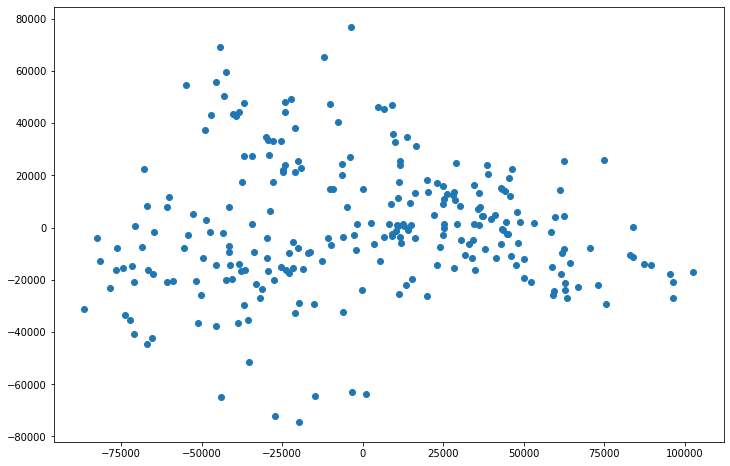

In [130]:
pca = PCA().fit(df)
pca_score = PCA().fit_transform(df)
plt.scatter(pca_score[:,0], pca_score[:,1])
plt.show()

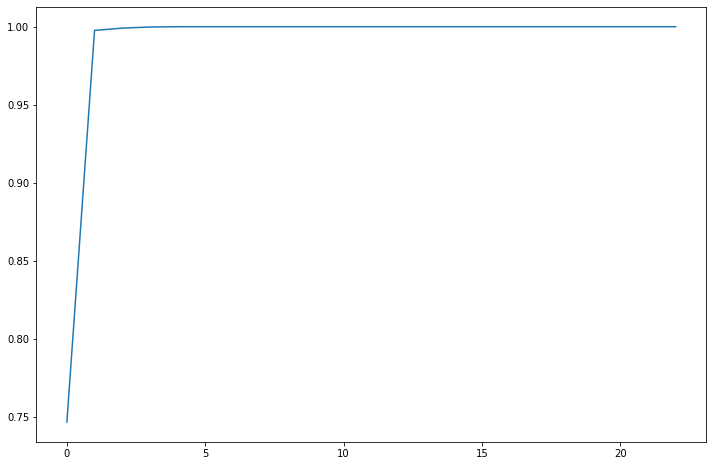

In [131]:
ratio = pca.explained_variance_ratio_
csum = np.cumsum(ratio)
a=list(range(len(ratio)))
plt.plot(a,csum)
plt.show()

In [141]:
np.argwhere(csum>=0.90)[0]

array([1])

In [142]:
np.argwhere(csum>=0.999)[0]

array([2])

# extremly high collinearity